# Mergers and groups with Galaxy Zoo 1 and Galaxy Zoo 2

In this notebook we use Galaxy Zoo 1 (GZ1) and Galaxy Zoo 2 (GZ2) data which has been matched to group data from Yang to investigate the relations between mergers and groups.

The GZ1 and GZ2 data can be found at https://data.galaxyzoo.org/
<br>
Information on Data Release 7 (DR7) of the Sloan Digital Sky Survery (SDSS) can be found at https://classic.sdss.org/dr7/
<br>
The Yang group data can be found at https://gax.sjtu.edu.cn/data/Group.html

#### Data
There are 4 different data sets we are using from the GZ data page. For GZ1 we are using "Table 2", which are galaxies from the entire GZ1 data set with spectra available in SDSS DR7 and "Table 3", which are galaxies from the entire GZ1 data set with no spectra available in SDSS DR7. These have 667,944 and 225,268 galaxies in them respectively.
<br>
For GZ1 we are using "Table 5", which are galaxies from the main GZ2 sample spectroscopic redshifts available in SDSS DR7 and "Table 6", which are galaxies from the main GZ2 sample with only photometric redshifts available in SDSS DR7. These have 243,500 and 42,462 galaxies in them respectively.
<br>
We use Yang Catalogue "PetroC" containing 639,359 galaxies and 473,872 groups.

#### Matching GZ1, GZ2 and Yang
The Yang data set covers redshifts $0.01 \leq z \leq 0.2$, whereas GZ1 and GZ2 cover a greater redshift range. Hence we expect to lose some galaxies when we match the GZ1&2 data to the Yang catalogue. We match the GZ1&2 data to the Yang data by right-ascension (ra) and declination (dec) with a maximum error in position of 5 arcsec, preferentially choosing galaxies with spectra available if both a galaxy from the spectroscopic data and from the photometric data match to the same Yang galaxy.

The total number of matches in Yang for each of the 4 galaxy zoo data sets are:

- GZ1 spectroscopic: 586,594 galaxies
- GZ1 photometric: 42,197 galaxies
- GZ2 spectroscopic: 233767 galaxies
- GZ2 photometric: 19,451 galaxies

In total there are 628,791 galaxies in Yang with GZ1 data and 253,218 galaxies in Yang with GZ2 data, with 629,365 galaxies from Yang having either GZ1 or GZ2 data and 252,644 galaxies with both GZ1 and GZ2 data.

From now on we shall refer to the Yang group data set of 639,359 galaxies as Yang, and the matched GZ1&2 and Yang data sets as GZ1 and GZ2.

### Importing the data
First we import the necessary packages and import the data into an Astropy Table "all_data".

We display the head of the table to get an idea of what the data looks like.

In [1]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import .fits data as a table
data_filename = "Data\Group_data_full_GZ1_GZ2_no_z.fits" # All galaxies in group data set with matched GZ1 & Gz2 galaxies

with fits.open(data_filename) as data:
    all_data = Table(data[1].data)

# gz2_data = gz2_data[(gz2_data["REDSHIFT"] >= 0.01) & (gz2_data["REDSHIFT"] <= 0.2)]

# Display head of data
display(all_data[0:5])

gz1_gz2_data = all_data[(all_data["GZ1"] == 1) |(all_data["GZ2"] == 1)]
gz1_spectro = all_data[all_data["GZ1_Table2"] == 1]
gz1_photo = all_data[all_data["GZ1_Table3"] == 1]
gz2_spectro = all_data[all_data["GZ2_main_spectroz"] == 1]
gz2_spectro = gz2_spectro[(gz2_spectro["REDSHIFT"] >= 0.01) & (gz2_spectro["REDSHIFT"] <= 0.2)]
gz2_photo = all_data[all_data["GZ2_main_photoz"] == 1]

galaxy ID_1_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size,specobjid,dr8objid,dr7objid,ra,dec,rastring,decstring,sample,gz2class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a11_just_noticeable_flag,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a12_obvious_flag,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_a13_dominant_debiased,t05_bulge_prominence_a13_dominant_flag,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a14_yes_debiased,t06_odd_a14_yes_flag,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_a15_no_debiased,t06_odd_a15_no_flag,t07_rounded_a16_completely_round_count,t07_roun

This table contains all data from Yang, and all the matched data from GZ1 and GZ2. Important columns to note are the columns indicating which data set each galaxy has data for. We show a sample of these below.

In [2]:
all_data["GZ1_Table2", "GZ1_Table3", "GZ1", "GZ2_main_spectroz", "GZ2_main_photoz", "GZ2"][1000:1010]

GZ1_Table2,GZ1_Table3,GZ1,GZ2_main_spectroz,GZ2_main_photoz,GZ2
int16,int16,int16,int16,int16,int16
1,0,1,0,0,0
1,0,1,1,0,1
1,0,1,1,0,1
1,0,1,0,0,0
1,0,1,0,0,0
1,0,1,0,0,0
0,1,1,0,1,1
1,0,1,1,0,1
1,0,1,1,0,1


Here, a 1 means the galaxy has data coming from the specified data set, and a 0 means there is no data from this data set. We have columns for each of the 4 individual data sets, and columns for GZ1 and GZ2 overall. 

### Spread of data
Now we have imported the data, we would like to know how it is spread as a function of certain variables, most importantly redshift and group size. We first plot histograms for each of the 4 data sets for redshift.

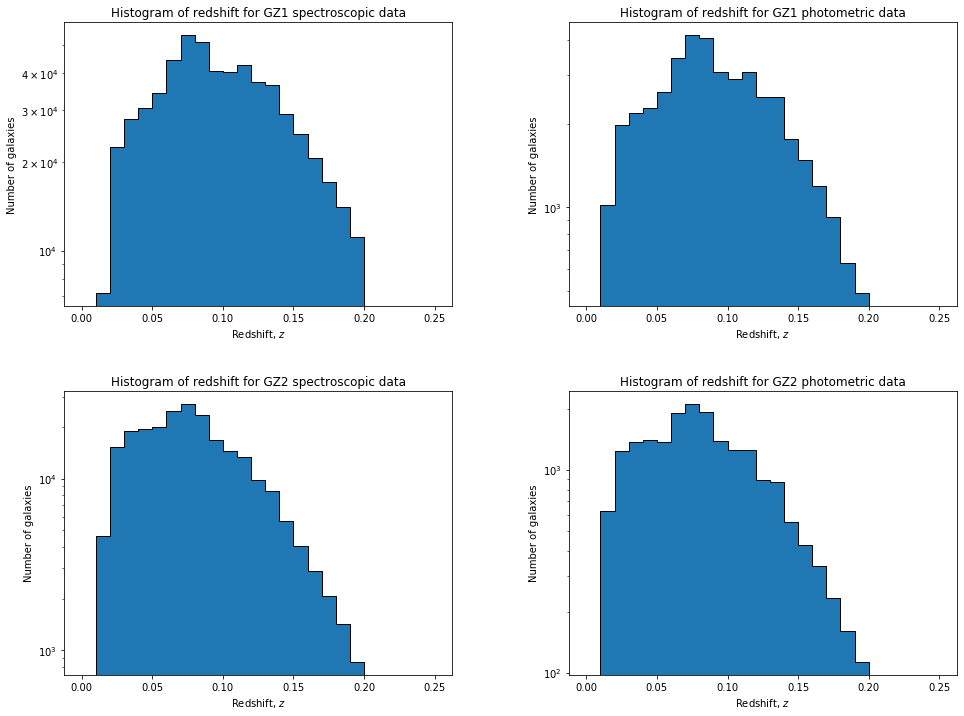

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))

z_bins = np.arange(0, 0.26, 0.01)

# Plot histogram of group size for Yang data
ax[0, 0].hist(gz1_spectro["z_galaxy"], bins=z_bins, edgecolor="black", histtype="stepfilled")
ax[0, 0].set_yscale("log")
ax[0, 0].set_xlabel("Redshift, $z$")
ax[0, 0].set_ylabel("Number of galaxies")
ax[0, 0].set_title("Histogram of redshift for GZ1 spectroscopic data")

# Plot histogram of group size for GZ2 data
ax[0, 1].hist(gz1_photo["z_galaxy"], bins=z_bins, edgecolor="black", histtype="stepfilled")
ax[0, 1].set_yscale("log")
ax[0, 1].set_xlabel("Redshift, $z$")
ax[0, 1].set_ylabel("Number of galaxies")
ax[0, 1].set_title("Histogram of redshift for GZ1 photometric data")

# Plot histogram of group size for Yang data
ax[1, 0].hist(gz2_spectro["REDSHIFT"], bins=z_bins, edgecolor="black", histtype="stepfilled")
ax[1, 0].set_yscale("log")
ax[1, 0].set_xlabel("Redshift, $z$")
ax[1, 0].set_ylabel("Number of galaxies")
ax[1, 0].set_title("Histogram of redshift for GZ2 spectroscopic data")

# Plot histogram of group size for GZ2 data
ax[1, 1].hist(gz2_photo["z_galaxy"], bins=z_bins, edgecolor="black", histtype="stepfilled")
ax[1, 1].set_yscale("log")
ax[1, 1].set_xlabel("Redshift, $z$")
ax[1, 1].set_ylabel("Number of galaxies")
ax[1, 1].set_title("Histogram of redshift for GZ2 photometric data")

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

All data sets have similar spreads in redshift, with peaks around $\sim z=0.8$, falling off as the redshift increases with over an order of magnitude difference between the number of galaxies in the largest and the smallest bin. The plots from the same GZ data set look the most similar, as we would naively expect.

We now plot histograms of group size for each of the 4 data sets.

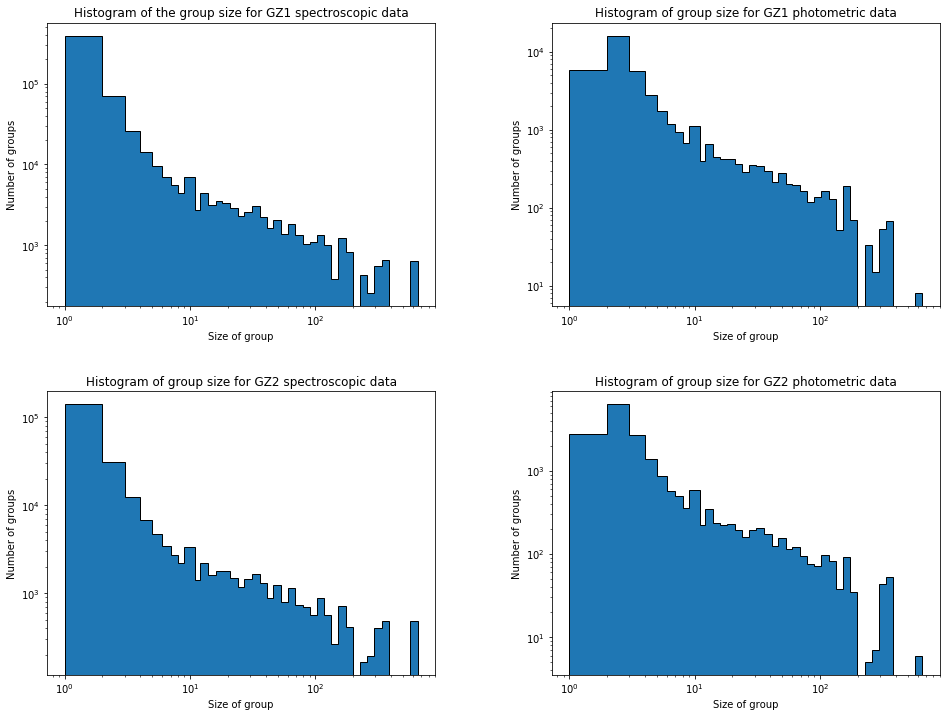

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))

# Create logarithmically spaced bins for logarithmic histogram plot
bin_start = np.log10(min(all_data["group_size"]))
bin_end = np.log10(max(all_data["group_size"]))
num_of_bins = 50
log_bins = np.logspace(bin_start, bin_end, num_of_bins)
log_bins = np.around(log_bins)
log_bins = np.unique(log_bins)

# Plot histogram of group size for Yang data
ax[0, 0].hist(gz1_spectro["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0, 0].set_xscale("log")
ax[0, 0].set_yscale("log")
ax[0, 0].set_xlabel("Size of group")
ax[0, 0].set_ylabel("Number of groups")
ax[0, 0].set_title("Histogram of the group size for GZ1 spectroscopic data")

# Plot histogram of group size for GZ2 data
ax[0, 1].hist(gz1_photo["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0, 1].set_xscale("log")
ax[0, 1].set_yscale("log")
ax[0, 1].set_xlabel("Size of group")
ax[0, 1].set_ylabel("Number of groups")
ax[0, 1].set_title("Histogram of group size for GZ1 photometric data")

# Plot histogram of group size for Yang data
ax[1, 0].hist(gz2_spectro["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[1, 0].set_xscale("log")
ax[1, 0].set_yscale("log")
ax[1, 0].set_xlabel("Size of group")
ax[1, 0].set_ylabel("Number of groups")
ax[1, 0].set_title("Histogram of group size for GZ2 spectroscopic data")

# Plot histogram of group size for GZ2 data
ax[1, 1].hist(gz2_photo["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[1, 1].set_xscale("log")
ax[1, 1].set_yscale("log")
ax[1, 1].set_xlabel("Size of group")
ax[1, 1].set_ylabel("Number of groups")
ax[1, 1].set_title("Histogram of group size for GZ2 photometric data")

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

Again, each of the 4 data sets has a similar spread in group size. It is interesting here that the data sets of each type (spectroscopic and photometric) are more similar instead of the data sets of each family (GZ1 and GZ2). The most obvious feature is that the photometric data does not have such a large peak of galaxies at a group size $N=1$, unlike the spectroscopic data which has a very large peak.

Possibly this is due to lone galaxies in groups of 1 are easier to obtain spectra for, as they do not have any other galaxies around them to interfere with the spectra.

### Number of groups
To get an idea of the number of groups of each group size, we will count the number of unique groups at each size and create a table of this data. We do this for the Yang catalogue, and for all galaxies we have either GZ1 or GZ2 data on.

In [5]:
# Create pandas dataframes to allow us to use pandas' groupby function
all_data_groups_pandas = all_data[["group_size", "group id"]].to_pandas()
gz1_gz2_data_groups_pandas = gz1_gz2_data[["group_size", "group id"]].to_pandas()

# Group data by group size, then count then unique number of groups and count the number of unique groups
all_data_group_counts = all_data_groups_pandas.groupby("group_size")["group id"].unique().apply(lambda x: len(x))
gz1_gz2_data_group_counts = gz1_gz2_data_groups_pandas.groupby("group_size")["group id"].unique().apply(lambda x: len(x))

# Create a dataframe and size column, easier to work with
all_data_group_counts = pd.DataFrame(all_data_group_counts)
all_data_group_counts.columns = ["Number of Groups"]
all_data_group_counts["size"] = all_data_group_counts.index

# Create a dataframe and size column, easier to work with
gz1_gz2_data_group_counts = pd.DataFrame(gz1_gz2_data_group_counts)
gz1_gz2_data_group_counts.columns = ["Number of Groups"]
gz1_gz2_data_group_counts["size"] = gz1_gz2_data_group_counts.index

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
all_data_group_counts_df = pd.DataFrame()
all_data_group_counts_df.loc[0, "groups"] = sum(all_data_group_counts["Number of Groups"])
all_data_group_counts_df.loc[0, "groups N=1"] = all_data_group_counts[all_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
all_data_group_counts_df.loc[0, "groups N=2"] = all_data_group_counts[all_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
all_data_group_counts_df.loc[0, "groups N=3"] = all_data_group_counts[all_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
all_data_group_counts_df.loc[0, "groups N=4"] = all_data_group_counts[all_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
all_data_group_counts_df.loc[0, "groups N=5"] = all_data_group_counts[all_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
all_data_group_counts_df.loc[0, "groups N>5"] = sum(all_data_group_counts[all_data_group_counts["size"] > 5]["Number of Groups"])
all_data_group_counts_df = all_data_group_counts_df.astype(int)

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
gz1_gz2_data_group_counts_df = pd.DataFrame()
gz1_gz2_data_group_counts_df.loc[0, "groups"] = sum(gz1_gz2_data_group_counts["Number of Groups"])
gz1_gz2_data_group_counts_df.loc[0, "groups N=1"] = gz1_gz2_data_group_counts[gz1_gz2_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
gz1_gz2_data_group_counts_df.loc[0, "groups N=2"] = gz1_gz2_data_group_counts[gz1_gz2_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
gz1_gz2_data_group_counts_df.loc[0, "groups N=3"] = gz1_gz2_data_group_counts[gz1_gz2_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
gz1_gz2_data_group_counts_df.loc[0, "groups N=4"] = gz1_gz2_data_group_counts[gz1_gz2_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
gz1_gz2_data_group_counts_df.loc[0, "groups N=5"] = gz1_gz2_data_group_counts[gz1_gz2_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
gz1_gz2_data_group_counts_df.loc[0, "groups N>5"] = sum(gz1_gz2_data_group_counts[gz1_gz2_data_group_counts["size"] > 5]["Number of Groups"])
gz1_gz2_data_group_counts_df = gz1_gz2_data_group_counts_df.astype(int)

# Create table of fraction of groups represented
group_representation = gz1_gz2_data_group_counts_df / all_data_group_counts_df

# Display tables
display(all_data_group_counts_df.style.set_caption("Yang group data:"))
display(gz1_gz2_data_group_counts_df.style.set_caption("GZ1&2 group data:"))
display(group_representation.style.set_caption("Fraction of Yang groups with at least 1 galaxy in GZ1 or GZ2:"))

,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,473872,405947,44441,10721,4388,2329,6046


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,468913,401147,44317,10697,4383,2327,6042


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,0.989535,0.988176,0.99721,0.997761,0.998861,0.999141,0.999338


As the plots suggested, most of the galaxies are in groups of only 1, with only very few groups of size > 5.

The fraction of groups in Yang that are also at least partially represented in GZ1 or GZ2 is very high, around 99% of groups in Yang are also in GZ1. This increases to almost 100% for groups of size $N > 5$, which we would expect (the more galaxies in a group the more likely it is at least 1 is also in GZ1 or GZ2). Only 4 groups of size $N>5$ do not have any galaxies in GZ1 or GZ2.

### Missing galaxies and group completeness
As the number of galaxies in GZ1 and GZ2 is smaller than the number in Yang, and we have seen that not all groups are represented, we expect that some groups will have missing galaxies; there will only be GZ1 or GZ2 data for a subset of the galaxies in the group.

We would like to know how complete the galaxy zoo data is for each group in GZ1 or GZ2, so we group the galaxies by their group id, and create a new column that gives the number of galaxies in each group that are also in the GZ data. The data already contains a column giving the number of galaxies in the group from Yang, so we can compare the number of galaxies represented in GZ1 and GZ2 to the total number of galaxies in the group, allowing us to see how many galaxies we are missing.

Here we add columns to the data giving the number of GZ galaxies in each group, the number of galaxies missing in each group, and the group completeness, which is the fraction of galaxies in each group also in GZ.

In [6]:
# Create a pandas dataframe to allow us to use pandas' groupby function
gz1_gz2_data_pandas = gz1_gz2_data.to_pandas()

# Group galaxies by their group_id and create a new column with the number of galaxies in each group in the data set
gz1_gz2_data_pandas["GZ_galaxies_in_group"] = gz1_gz2_data_pandas.groupby("group id")["group id"].transform("size")

# Create a new column with the number of galaxies missing from each group in the data set
gz1_gz2_data_pandas["galaxies_missing"] = gz1_gz2_data_pandas["group_size"] - gz1_gz2_data_pandas["GZ_galaxies_in_group"]

# Create a new column with the fractional completeness of the group
gz1_gz2_data_pandas["group_completeness"] = gz1_gz2_data_pandas["GZ_galaxies_in_group"] / gz1_gz2_data_pandas["group_size"]

# Turn the dataframe back into an astropy table and display the new columns
gz1_gz2_data = Table.from_pandas(gz1_gz2_data_pandas)
gz1_gz2_data[["group id", "group_size", "GZ_galaxies_in_group", "galaxies_missing", "group_completeness"]][0:10]

group id,group_size,GZ_galaxies_in_group,galaxies_missing,group_completeness
int32,int64,int64,int64,float64
67926,1,1,0,1.0
23485,2,2,0,1.0
23485,2,2,0,1.0
67928,1,1,0,1.0
67929,1,1,0,1.0
23486,2,2,0,1.0
23486,2,2,0,1.0
67930,1,1,0,1.0
67931,1,1,0,1.0


An example of the new columns we have created are shown above with the head of the data.

To see how the group completeness is spread, we create a scatter plot of group completeness against group size.

Average completeness of groups N>=5: 0.98
Average completeness of groups N>=10: 0.984
Average completeness of groups N>=30: 0.984


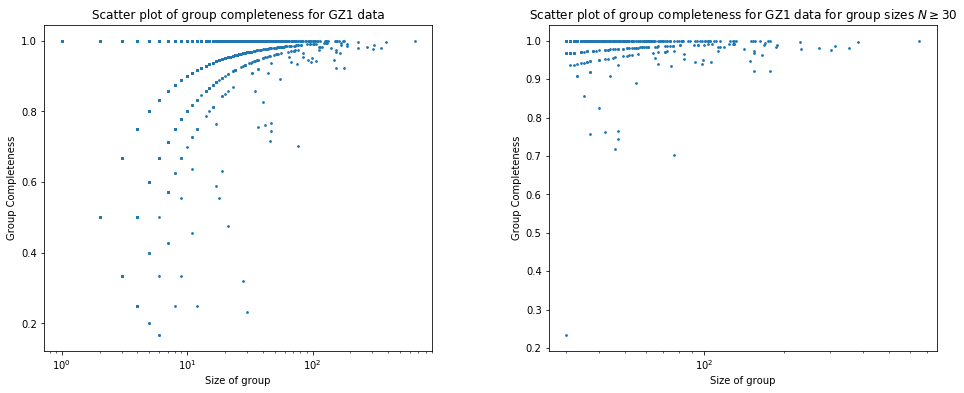

In [7]:
# Create a pandas dataframe and group data by size of groups,
# calculating the average completeness for groups greater than a cetain size
groups_unique = gz1_gz2_data_pandas.drop_duplicates(subset=["group id"], keep="first")  # Only keep 1 row for each group
groups_5_completeness = groups_unique[groups_unique["group_size"] >= 5]["group_completeness"].mean()
groups_10_completeness = groups_unique[groups_unique["group_size"] >= 10]["group_completeness"].mean()
groups_30_completeness = groups_unique[groups_unique["group_size"] >= 30]["group_completeness"].mean()
print("Average completeness of groups N>=5: " + str(np.round(groups_5_completeness, decimals=3)))
print("Average completeness of groups N>=10: " + str(np.round(groups_10_completeness, decimals=3)))
print("Average completeness of groups N>=30: " + str(np.round(groups_30_completeness, decimals=3)))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(groups_unique["group_size"], groups_unique["group_completeness"], s=3)
ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Group Completeness")
ax[0].set_title("Scatter plot of group completeness for GZ1 data")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
groups_unique_30 = groups_unique[groups_unique["group_size"] >= 30]
ax[1].scatter(groups_unique_30["group_size"], groups_unique_30["group_completeness"], s=3)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Group Completeness")
ax[1].set_title("Scatter plot of group completeness for GZ1 data for group sizes $N \geq 30$")

fig.subplots_adjust(wspace=0.3)

plt.show()

On average, groups with $N \geq 5$ have an average group completeness of 0.98, and groups with $N \geq 10$ have an average group completeness of 0.984.

For small group sizes there are some groups which have a low group completeness (as missing 1 galaxy from the group significantly reduces the completeness). As can be seen in the scond plot, all groups have a completeness of greater than 0.7, with most being greater than 0.9.

The high group completeness for means that we can be confident we are sampling a good amount of data to draw conclusions from our analysis of groups using GZ1 and GZ2.

### Classifying mergers
As GZ1 and GZ2 have different decision trees, we must classify mergers in a different way for each. We can then compare the classifications for galaxies which are in both sets, to see if our classification methods are consistent.

For GZ1 we will use the threshold for merger classification as described in [Darg et al. (2009)](https://arxiv.org/pdf/0903.4937.pdf):
- merger weighted vote fraction $p_m$ > 0.4

Note that this was used in Darg et al. (2009) for only galaxies with redshifts $0.005 < z < 0.1$, but we will use it for galaxies in the range $0.1 \leq z \leq 0.2$ here also.

For GZ2 we will use the threshold for merger classification we have done previously:
- "t06_odd_a14_yes_count" $\geq$ 20
- "t06_odd_a14_yes_debiased" > 0.42
- "t08_odd_feature_a24_merger_count" $\geq$ 10
- "t08_odd_feature_a24_merger_debiased" > 0.4

#### GZ1
First we will look at mergers for GZ1, individually for the spectroscopic data and the photometric data.

Number of mergers in GZ1 spectroscopic data: 9349
Number of mergers in GZ1 photometric data: 3400


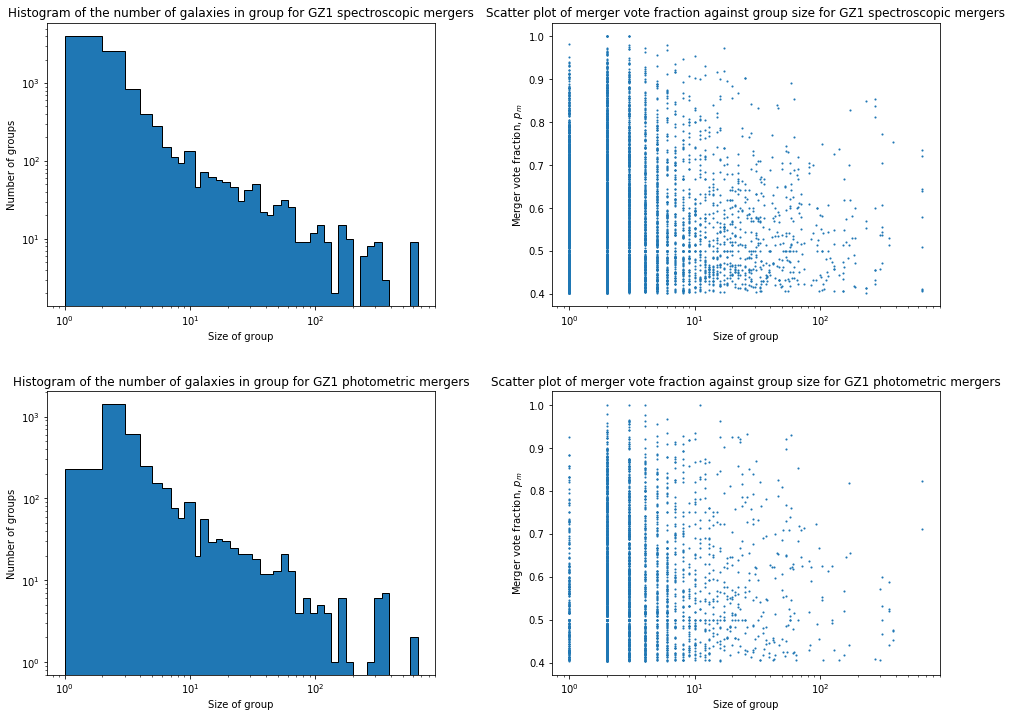

In [8]:
# Create a new column in the data for GZ1 mergers, with a value of 1 if the galaxy is classified as a merger, and 0 if not
all_data_pandas = all_data.to_pandas()
all_data_pandas["GZ1_merger_yes"] = 0
all_data_pandas.loc[all_data_pandas["P_MG"] > 0.4, "GZ1_merger_yes"] = 1
all_data = Table.from_pandas(all_data_pandas)

# New tables of only the galaxies classified as mergers
gz1_spectro_mergers = all_data[(all_data["GZ1_Table2"] == 1) & (all_data["GZ1_merger_yes"] == 1)]
gz1_photo_mergers = all_data[(all_data["GZ1_Table3"] == 1) & (all_data["GZ1_merger_yes"] == 1)]
print("Number of mergers in GZ1 spectroscopic data: "+ str(len(gz1_spectro_mergers)))
print("Number of mergers in GZ1 photometric data: "+ str(len(gz1_photo_mergers)))

fig, ax = plt.subplots(2, 2, figsize=(16,12))

# Plot histogram of group size for galaxies classified as mergers
ax[0, 0].hist(gz1_spectro_mergers["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0, 0].set_xscale("log")
ax[0, 0].set_yscale("log")
ax[0, 0].set_xlabel("Size of group")
ax[0, 0].set_ylabel("Number of groups")
ax[0, 0].set_title("Histogram of the number of galaxies in group for GZ1 spectroscopic mergers")

# Plot scatter plot of merger vote fraction against group size, for galaxies classified as mergers
ax[0, 1].scatter(gz1_spectro_mergers["group_size"], gz1_spectro_mergers["P_MG"], s=1.2)
ax[0, 1].set_xscale("log")
ax[0, 1].set_xlabel("Size of group")
ax[0, 1].set_ylabel("Merger vote fraction, $p_m$")
ax[0, 1].set_title("Scatter plot of merger vote fraction against group size for GZ1 spectroscopic mergers")

# Plot histogram of group size for galaxies classified as mergers
ax[1, 0].hist(gz1_photo_mergers["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[1, 0].set_xscale("log")
ax[1, 0].set_yscale("log")
ax[1, 0].set_xlabel("Size of group")
ax[1, 0].set_ylabel("Number of groups")
ax[1, 0].set_title("Histogram of the number of galaxies in group for GZ1 photometric mergers")

# Plot scatter plot of merger vote fraction against group size, for galaxies classified as mergers
ax[1, 1].scatter(gz1_photo_mergers["group_size"], gz1_photo_mergers["P_MG"], s=1.2)
ax[1, 1].set_xscale("log")
ax[1, 1].set_xlabel("Size of group")
ax[1, 1].set_ylabel("Merger vote fraction, $p_m$")
ax[1, 1].set_title("Scatter plot of merger vote fraction against group size for GZ1 photometric mergers")

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

We see roughly the same spread of group size for the merger data as we have done previously for the complete GZ1 spectroscopic and photometric data sets. We do not expect the exact same spread as we have a prior belief that the fraction of mergers is correlated with group size in some way. We will later investigate the merger fraction (the fraction of galaxies that are merging) as a function of group size to see how group size affects the likelihood of a galaxy being a merger.

The merger vote fraction seems to be randomly spread in group size.

In [ ]:
all_data_pandas[all_data_pandas["GZ1_merger_yes"] == 1]

In [ ]:
all_data_pandas["GZ2_merger_yes"] = 0
all_data_pandas.loc[(all_data_pandas["GZ2"] == 1) & (all_data_pandas["t06_odd_a14_yes_count"] >= 20) & (all_data_pandas["t06_odd_a14_yes_debiased"] > 0.42) & (all_data_pandas["t08_odd_feature_a24_merger_count"] >= 10) & (all_data_pandas["t08_odd_feature_a24_merger_debiased"] > 0.4), "GZ2_merger_yes"] = 1

In [ ]:
all_data_pandas[all_data_pandas["GZ2_merger_yes"] == 1]

In [ ]:
all_data_pandas["Merger_classifications"] = all_data_pandas["GZ1_merger_yes"] + all_data_pandas["GZ2_merger_yes"]
all_data_pandas[all_data_pandas["Merger_classifications"] > 0]

In [ ]:
all_data_pandas[(all_data_pandas["GZ1_merger_yes"] == 0) & (all_data_pandas["GZ2_merger_yes"] == 1)]

In [ ]:
all_data_pandas[(all_data_pandas["GZ1_merger_yes"] == 1) & (all_data_pandas["GZ2_merger_yes"] == 0)]

In [ ]:
all_data_pandas[all_data_pandas["Merger_classifications"] == 2]